In [97]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('gdp.csv')
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


## 1) How many unique Countries Data we're having in the dataset?

In [77]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [78]:
df1 = df["Country Name"].nunique()

In [79]:
df1

256

In [80]:
country = df["Country Name"]
print(country)

0        Arab World
1        Arab World
2        Arab World
3        Arab World
4        Arab World
            ...    
11502      Zimbabwe
11503      Zimbabwe
11504      Zimbabwe
11505      Zimbabwe
11506      Zimbabwe
Name: Country Name, Length: 11507, dtype: object


## 2) How many years of Data we're having for India

In [81]:
india_data = df[df["Country Name"] == "India"]

# Print the filtered rows
print(india_data)

     Country Name Country Code  Year         Value
6074        India          IND  1960  3.653593e+10
6075        India          IND  1961  3.870910e+10
6076        India          IND  1962  4.159907e+10
6077        India          IND  1963  4.777600e+10
6078        India          IND  1964  5.572687e+10
6079        India          IND  1965  5.876042e+10
6080        India          IND  1966  4.525364e+10
6081        India          IND  1967  4.946617e+10
6082        India          IND  1968  5.237732e+10
6083        India          IND  1969  5.766833e+10
6084        India          IND  1970  6.158980e+10
6085        India          IND  1971  6.645256e+10
6086        India          IND  1972  7.050991e+10
6087        India          IND  1973  8.437454e+10
6088        India          IND  1974  9.819828e+10
6089        India          IND  1975  9.715922e+10
6090        India          IND  1976  1.013470e+11
6091        India          IND  1977  1.198667e+11
6092        India          IND 

In [82]:
count = 0

for i in country:
    if i == "India":
        count+=1

print(count)

57


## 3) Whats the world GDP in 1969?

In [83]:
gdp = df[df["Year"] == 1969].sum()

In [84]:
print(gdp)

Country Name    Arab WorldCaribbean small statesEarly-demograp...
Country Code    ARBCSSEAREASEAPTEAEMUECSEUUHPCHICIBDIBTIDBIDAL...
Year                                                       299288
Value                                       19577201579296.539062
dtype: object


In [85]:
gdp = df[df["Year"] == 1969]["Value"].sum()

In [86]:
print("World gdp in 1969:",gdp)

World gdp in 1969: 19577201579296.54


## 4) Whats the % of GDP growth of India in Year 1994 (*as compare to 1993)?

In [87]:
gdp_1993 = df[(df["Country Name"] == "India") & (df["Year"] == 1993)]["Value"].values[0]
gdp_1994 = df[(df["Country Name"] == "India") & (df["Year"] == 1994)]["Value"].values[0]
print(gdp_1993,gdp_1994)

275570363432.31 322909902308.131


In [88]:
gdpp = ((gdp_1994 - gdp_1993) / gdp_1993) * 100
gdpp

17.178748210146075

# Tasks

### 1) Find GDP Growth of India from 1960 - 2016
### 2) Create a new columns named as GDP which shows the GDP growth of each country for that year
### 3) Create a graph of GDP Growth of India from 1960 - 2016

GDP Growth of india from 1960 - 2016

In [92]:
india_data = india_data.sort_values(by="Year")
last_year_val = india_data[india_data["Year"] == 1960]["Value"].values[0]


value_list = india_data["Value"].tolist()

for value in value_list:
    if value == last_year_val:
        continue
    
    gdp_growth = ((value - last_year_val) / last_year_val) * 100
    print(f"GDP growth of India every year: {gdp_growth:.2f}%")
    last_year_val = value

GDP growth of India every year: 5.95%
GDP growth of India every year: 7.47%
GDP growth of India every year: 14.85%
GDP growth of India every year: 16.64%
GDP growth of India every year: 5.44%
GDP growth of India every year: -22.99%
GDP growth of India every year: 9.31%
GDP growth of India every year: 5.89%
GDP growth of India every year: 10.10%
GDP growth of India every year: 6.80%
GDP growth of India every year: 7.90%
GDP growth of India every year: 6.11%
GDP growth of India every year: 19.66%
GDP growth of India every year: 16.38%
GDP growth of India every year: -1.06%
GDP growth of India every year: 4.31%
GDP growth of India every year: 18.27%
GDP growth of India every year: 13.02%
GDP growth of India every year: 11.43%
GDP growth of India every year: 21.79%
GDP growth of India every year: 3.85%
GDP growth of India every year: 3.73%
GDP growth of India every year: 8.74%
GDP growth of India every year: -2.80%
GDP growth of India every year: 9.59%
GDP growth of India every year: 7.09%



Create a new columns named as GDP which shows the GDP growth of each country for that year

In [93]:
df = df.sort_values(by=["Country Name", "Year"])

# Initialize a new column for GDP Growth
df["GDP"] = None

# Calculate GDP Growth for each country
for country in df["Country Name"].unique():
    # Filter data for the current country
    country_data = df[df["Country Name"] == country]
    
    # Calculate year-on-year GDP growth
    for i in range(1, len(country_data)):
        current_year_value = country_data.iloc[i]["Value"]
        previous_year_value = country_data.iloc[i - 1]["Value"]
        
        # Calculate GDP growth
        gdp_growthw = ((current_year_value - previous_year_value) / previous_year_value) * 100
        
    
        df.loc[country_data.index[i], "GDP"] = gdp_growthw


In [94]:
df.head()

,Country Name,Country Code,Year,Value,GDP
2306,Afghanistan,AFG,1960,5.377778e+08,None
2307,Afghanistan,AFG,1961,5.488889e+08,2.066111
2308,Afghanistan,AFG,1962,5.466667e+08,-0.404857
2309,Afghanistan,AFG,1963,7.511112e+08,37.398386
2310,Afghanistan,AFG,1964,8.000000e+08,6.50887


Create a graph of GDP Growth of India from 1960 - 2016


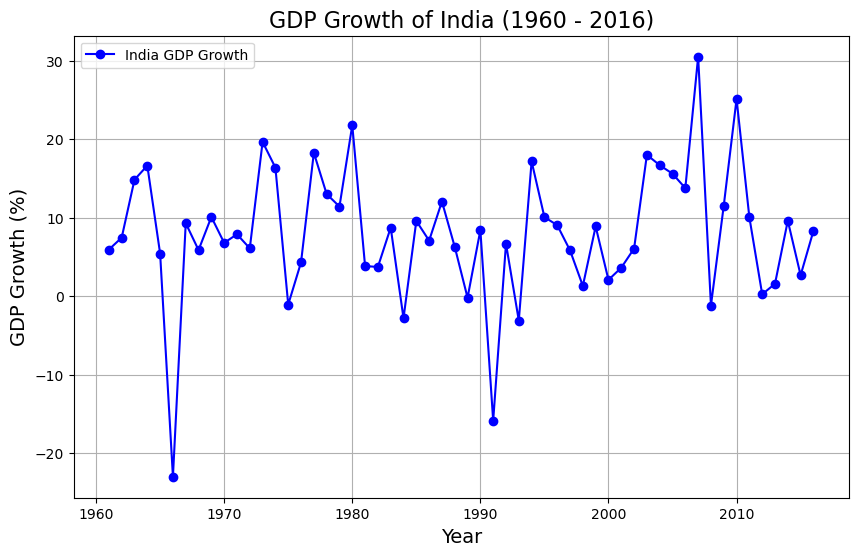

In [98]:
india_data = df[df["Country Name"] == "India"]

# Sort the data by year
india_data = india_data.sort_values(by="Year")

# Calculate year-on-year GDP growth
india_data["GDP Growth"] = india_data["Value"].pct_change() * 100

# Plot the GDP Growth of India
plt.figure(figsize=(10, 6))
plt.plot(india_data["Year"], india_data["GDP Growth"], marker="o", linestyle="-", color="b", label="India GDP Growth")

# Add title and labels
plt.title("GDP Growth of India (1960 - 2016)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("GDP Growth (%)", fontsize=14)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
